![PyTorch](https://devblogs.nvidia.com/wp-content/uploads/2017/04/pytorch-logo-dark.png)

An open source machine learning framework that accelerates the path from research prototyping to production deployment.



# Tensor - Pytorch's core data structure

In Python we can create lists, lists of lists, lists of lists and so on. In NumPy there is a `numpy.ndarray` which represents `n`- dimensional array. In math there is a special name for the generalization of vectors and matrices to a higher dimensional space - a tensor

Tensor is an entity with a defined number of dimensions called an order (rank). 

**Scalar** can be considered as a rank-0-tensor. 

**Vector** can be introduced as a rank-1-tensor. 

**Matrices** can be considered as a rank-2-tensor.

# Tensor Basics

Let's import the torch module first.

In [1]:
import numpy as np
import torch

## Tensor Creation
Let's view examples of matrices and tensors generation

2-dimensional (rank-2) tensor of zeros:

In [2]:
torch.zeros(3, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Random rank-3 tensor:
_read the print below and convince yourself how this is a rank-3-tensor and learn what those 2, 3, 4 values are there for_

In [3]:
torch.rand(2, 3, 4)

tensor([[[0.1971, 0.9615, 0.4228, 0.5584],
         [0.0330, 0.6037, 0.3758, 0.0661],
         [0.1361, 0.7076, 0.5565, 0.7439]],

        [[0.1709, 0.8811, 0.9911, 0.7959],
         [0.5358, 0.8714, 0.2516, 0.5273],
         [0.3969, 0.8329, 0.6717, 0.2746]]])

I am hoping you have noticed 4-elements in a row, 3 rows making one block and there are 2 blocks. 

Random rank-4-tensor:

In [4]:
torch.rand(2, 2, 2, 3)

tensor([[[[0.4537, 0.7487, 0.9806],
          [0.6135, 0.7438, 0.1976]],

         [[0.7706, 0.5413, 0.8697],
          [0.9613, 0.0027, 0.3169]]],


        [[[0.7179, 0.3427, 0.3196],
          [0.9608, 0.7390, 0.7100]],

         [[0.3569, 0.8557, 0.5524],
          [0.7078, 0.8395, 0.5898]]]])

## Question 1:

How many dimensions are there in a tensor defined as below? Ans: 4

In [5]:
torch.rand(1, 1, 1, 1)

tensor([[[[0.1063]]]])

In [6]:
# Q1
a = torch.rand(1, 1, 1, 1)
print(a.dim())

4


.

---


There are many more ways to create tensor using some restrictions on values it should contain - for the full reference, please follow the [official docs](https://pytorch.org/docs/stable/torch.html#creation-ops). 


.
---


# Python / NumPy / Pytorch interoperability

You can create tensors from python as well as numpy arrays. You can also convert torch tensors to numpy arrays. So, the interoperability between torch and numpy is pretty good. 

In [7]:
# Simple Python List
python_list = [1, 2]

# Create a numpy array from python list
numpy_array = np.array(python_list)

# Create a torch Tensor from python list
tensor_from_list = torch.tensor(python_list)

# Create a torch Tensor from Numpy array
tensor_from_array = torch.tensor(numpy_array)

# Another way to create a torch Tensor from Numpy array (share same storage)
tensor_from_array_v2 = torch.from_numpy(numpy_array)

# Convert torch tensor to numpy array
array_from_tensor = tensor_from_array.numpy()

print('List:   ', python_list)
print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_list)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)
print('Array:  ', array_from_tensor)

List:    [1, 2]
Array:   [1 2]
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2])
Array:   [1 2]


In [8]:
# Memory behavior
np_array = np.array([1,2])
print(np_array.__array_interface__['data'][0])

tensor_list = torch.tensor([1,2])
print(tensor_list.data_ptr())

tensor_array1 = torch.tensor(np_array)
print(tensor_array1.data_ptr())

tensor_array2 = torch.from_numpy(np_array)
print(tensor_array2.data_ptr()) # shares np_array address

array_tensor1 = tensor_array1.numpy()
print(array_tensor1.__array_interface__['data'][0]) # shares the tensor_array1 address

array_tensor2 = tensor_array2.numpy()
print(array_tensor2.__array_interface__['data'][0]) # shares the tensor_array2 address which is sharing np_array address

105370528
105346880
105347264
105370528
105347264
105370528


**Difference between** `torch.Tensor` **and** `torch.from_numpy`

Pytorch aims to be an effective library for computations. What does it mean? It means that **pytorch avoids memory copying if it can.** 

In [9]:
numpy_array[0] = 10

print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2) # changes to numpy array changes the tensor.

Array:   [10  2]
Tensor:  tensor([1, 2])
Tensor:  tensor([10,  2])


## Question 2:

Assume that we moved our complete (cats vs dogs) image dataset to numpy arrays. Then we use torch.from_numpy to convert these images to tensor. Then we apply a specific data augmentation strategy called "CutOut" which blocks a portion of the image directly on these tensors. What will happen to the accuracy of a model trained on this strategy compared to the one without this strategy? CutOut strategy is shown below: 

![CutOut](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSnSyN835AmtQPKQbPjDHX-FmshNilbtexX95cRGQPwl56QCGDn)

Ans: Not attempted 
(Our model will not train and get stuck at 50% accuracy.)
## Question 3:
Why do you think we are observing this behavior?
Ans: Not attempted 

(The way we have implemented the strategy, we will end up adding black blocks on images while changing the original image. After few operations, whole image will just be black.Then network would see just black images for dogs and cats, and thereby failing in recognizing either, getting stuck at 50% accuracy.) 



---




We have two different ways to create tensor from its NumPy counterpart - one copies memory and another one shares the same underlying storage. It works in the opposite way:

In [10]:
array_from_tensor = tensor_from_array.numpy() # created from  torch.tensor(np_array)
print('Tensor: ', tensor_from_array)
print('Array: ', array_from_tensor)

tensor_from_array[0] = 11  # changes to tensor changes the numpy array.
print('Tensor: ', tensor_from_array)
print('Array: ', array_from_tensor) 

Tensor:  tensor([1, 2])
Array:  [1 2]
Tensor:  tensor([11,  2])
Array:  [11  2]


## Data types

The basic data type of all Deep Learning-related operations is float, but sometimes you may need something else. Pytorch supports different number types for its tensors the same way NumPy does it - by specifying the data type on tensor creation or via casting. Ths full list of supported data types can be found [here](https://pytorch.org/docs/stable/tensors.html). 

In [11]:
tensor = torch.zeros(2, 2)
print('Tensor with default type: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.float16)
print('Tensor with 16-bit float: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.int16)
print('Tensor with integers: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.bool)
print('Tensor with boolean data: ', tensor)

Tensor with default type:  tensor([[0., 0.],
        [0., 0.]])
Tensor with 16-bit float:  tensor([[0., 0.],
        [0., 0.]], dtype=torch.float16)
Tensor with integers:  tensor([[0, 0],
        [0, 0]], dtype=torch.int16)
Tensor with boolean data:  tensor([[False, False],
        [False, False]])




---


## Question 4:
We saw above that some times numpy and tensors share same storage and changing one changes the other. 
If we define a rank-2-tensor with ones (dtype of f16), and then convert it into a numpy data type using tensor.numpy() and store it in a variable called "num", and then we perform this operation `num = num * 0.5`, will the original tensor have 1.0s or 0.5s as its element values?  Ans: 1.0s 


In [12]:
# Q4
tensor = torch.ones(2, 2, dtype=torch.float16)
print(tensor.data_ptr())
num = tensor.numpy() 
print(num.__array_interface__['data'][0]) 
num = num * 0.5 
print(num.__array_interface__['data'][0]) # it's not a pointer linking back
print(tensor)
print(num)

105347200
105347200
51357496
tensor([[1., 1.],
        [1., 1.]], dtype=torch.float16)
[[0.5 0.5]
 [0.5 0.5]]


In [13]:
# Similar example
tensor = torch.ones(2, 2, dtype=torch.float16)
print(tensor.data_ptr())
num = tensor.numpy() 
print(num.__array_interface__['data'][0]) 
num = num + 0.5
print(num.__array_interface__['data'][0]) 
print(tensor)
print(num)

105347136
105347136
51357496
tensor([[1., 1.],
        [1., 1.]], dtype=torch.float16)
[[1.5 1.5]
 [1.5 1.5]]




---

## Question 5: 
If the operation `num = num*5` is changed to `num[:] = num*0.5` will the original tensor have 1.0s or 0.5s as its element values? Ans: 0.5s



---



In [14]:
# Q5 # A slice of an array is a view into the same data, so modifying it will modify the original array.
tensor = torch.ones(2, 2, dtype=torch.float16)
print(tensor.data_ptr())
num = tensor.numpy()
print(num.__array_interface__['data'][0]) 
num[:] = num * 0.5 # we have made an array as a pointer # get a slice of the whole
print(num.__array_interface__['data'][0]) 
print(tensor) 
print(num)

105347200
105347200
105347200
tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]], dtype=torch.float16)
[[0.5 0.5]
 [0.5 0.5]]


In [15]:
# Similar example
tensor = torch.ones(2, 2, dtype=torch.float16)
print(tensor.data_ptr())
num = tensor.numpy() 
print(num.__array_interface__['data'][0]) 
num += 0.5
print(num.__array_interface__['data'][0]) 
print(tensor)
print(num)

105347136
105347136
105347136
tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]], dtype=torch.float16)
[[1.5 1.5]
 [1.5 1.5]]


## Indexing

Tensor provides access to its elements via the same `[]` operation as a regular python list or NumPy array. However, as you may recall from NumPy usage, the full power of math libraries is accessible only via vectorized operations, i.e. operations without explicit looping over all vector elements in python and using implicit optimized loops in C/C++/CUDA/Fortran/etc. available via special function calls. Pytorch employs the same paradigm and provides a wide range of vectorized operations. Let's take a look at some examples. 

Joining a list of tensors together with `torch.cat`

In [16]:
a = torch.zeros(3, 2)
b = torch.ones(3, 2)
print(torch.cat((a, b), dim=0))

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])




---

## Question 6: 
Is the transpose of concatenated a & b tensor on dimension 1, same as the contatenated tensor of a & b on dimension 0? Ans: No



---



In [17]:
# Q6
a = torch.zeros(3, 2)
b = torch.ones(3, 2)
cat_0 = torch.cat((a,b),dim=0)
cat_1 = torch.cat((a,b),dim=1)
print(cat_0)
print(cat_1.T) # can check shapes

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])


Indexing with another tensor/array:

In [18]:
a = torch.arange(start=0, end=10)
indices = np.arange(0, 10) > 5
print(a)
print(indices)
print(a[indices])

indices = torch.arange(start=0, end=10) %5
print(indices)
print(a[indices])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
[False False False False False False  True  True  True  True]
tensor([6, 7, 8, 9])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])




---

## Question 7:

`a` is defined as `torch.arange(start=0, end=10)`. We will create `b` using the two operations as below. In both cases do we get the same value?


1.   indices variable created by the modulo operation on arange between 0 and 10. Then a new varialble `b` is created from `a` using the last 5 elements of indices. 
2.   indices variable created by the modulo operation on arange between 1 and 11. Then a new varialble `b` is created from `a` using the last 5 elements of indices.

Ans: False (this is the right answer)



---




In [19]:
# Q7 
a = torch.arange(start=0, end=10)

In [20]:
indices = torch.arange(start = 0, end = 10) % 5
b = a[indices[5:]]
print(b)

tensor([0, 1, 2, 3, 4])


In [21]:
indices = torch.arange(start = 1,end = 11) % 5
b = a[indices[5:]]
print(b)

tensor([1, 2, 3, 4, 0])


What should we do if we have, say, rank-2-tensor and want to select only some rows?

In [22]:
tensor = torch.rand((5, 3))
rows = torch.tensor([0, 2])
print(tensor)
tensor[rows]

tensor([[0.1317, 0.9885, 0.1506],
        [0.2019, 0.6788, 0.4113],
        [0.6196, 0.2433, 0.2162],
        [0.4206, 0.8629, 0.0761],
        [0.0094, 0.1418, 0.5844]])


tensor([[0.1317, 0.9885, 0.1506],
        [0.6196, 0.2433, 0.2162]])



---

## Question 8: 

Consider a tensor defined as `torch.rand((6, 5))`. Is the shape of the new tensor created by taking the 0th, 2nd and 4th row of the old tensor same as the shape of the a newer tensor created by taking the 0th, 2nd and 4th row of the old tensor after transposing it by operation `torch.transpose(tensor, 0, 1)` ? Ans: False



---




In [23]:
# Q8
tensor = torch.rand((6,5))
new_rows = torch.tensor([0,2,4])
tensor[new_rows].shape

torch.Size([3, 5])

In [24]:
tensor = torch.rand((6,5))
tensor_trans = torch.transpose(tensor,0,1)
newer_rows = torch.tensor([0,2,4])
tensor_trans[newer_rows].shape

torch.Size([3, 6])

## Tensor Shapes

Reshaping a tensor is a frequently used operation. We can change the shape of a tensor without the memory copying overhead. There are two methods for that: `reshape` and `view`. 

The difference is the following: 


*   view tries to return a tensor, and it shares the same memory with the original tensor. In case, if it cannot reuse the same memory due to [some reason](https://pytorch.org/docs/stable/tensors.html?highlight=view#torch.Tensor.view), it just fails. 
*   reshape always returns the tensor with the desired shape and tries to reuse the memory. If it cannot, it creates a copy

Let's see with the help of an example:

In [25]:
tensor = torch.rand(2, 3, 4)
print('Pointer to data: ', tensor.data_ptr())
print('Shape: ', tensor.shape)

reshaped = tensor.reshape(24)
print('Reshaped tensor - pointer to data', reshaped.data_ptr())
print('Reshaped tensor shape ', reshaped.shape)

view = tensor.view(3, 2, 4)
print('Viewed tensor - pointer to data', view.data_ptr())
print('Viewed tensor shape ', view.shape)

assert tensor.data_ptr() == view.data_ptr()

assert np.all(np.equal(tensor.numpy().flat, reshaped.numpy().flat))

print('Original stride: ', tensor.stride())
print('Reshaped stride: ', reshaped.stride())
print('Viewed stride: ', view.stride())

Pointer to data:  104697088
Shape:  torch.Size([2, 3, 4])
Reshaped tensor - pointer to data 104697088
Reshaped tensor shape  torch.Size([24])
Viewed tensor - pointer to data 104697088
Viewed tensor shape  torch.Size([3, 2, 4])
Original stride:  (12, 4, 1)
Reshaped stride:  (1,)
Viewed stride:  (8, 4, 1)


The basic rule about reshaping the tensor is definitely that you cannot change the total number of elements in it, so the product of all tensor's dimensions should always be the same. It gives us the ability to avoid specifying one dimension when reshaping the tensor - Pytorch can calculate it for us:

In [26]:
print(tensor.reshape(3, 2, 4).shape)
print(tensor.reshape(3, 2, -1).shape)
print(tensor.reshape(3, -1, 4).shape)

torch.Size([3, 2, 4])
torch.Size([3, 2, 4])
torch.Size([3, 2, 4])




---


## Question 9:

Consider a tensor `a` created with [1, 2, 3] and [1, 2, 3] of size (2, 3) is reshaped with operation `.reshape(-1, 2)`. Also consider a tensor `b` created with [[2, 1]] and of size (1, 2), later operated with `view(2, -1)` operation. 

If we do a dot product of a and b (using `torch.mm`) and perform the sum of all the elements (using `torch.sum`) what do we get? (enter int value without any decimal point in the quiz)



---



In [27]:
# Q2
a = torch.tensor([[1,2,3],[1,2,3]])
a = a.reshape((-1,2))
print(a.shape)

torch.Size([3, 2])


In [28]:
b = torch.tensor([[2,1]])
b = b.view(2,-1)
print(b.shape)

torch.Size([2, 1])


In [29]:
print(int(torch.sum(torch.mm(a,b))))

18


**Alternative ways to view tensors** - `expand` or `expand_as`.



*   `expand` - requires the desired shape as an input
*   `expand_as` - uses the shape of another tensor

These operations "repeat" tensor's values along the specified axes without actually copying the data. 

As the documentation says, expand:


> returns a new view of the self tensor with singleton dimensions expanded to a larger size. Tensor can be also expanded to a larger number of dimensions, and the new ones will be appended at the front. For the new dimensions, the size cannot be set to -1. 

**Use case:**



*   index multi-channel tensor with single-channel mask - imagine a color image with 3 channels (RGB) and binary mask for the area of interest on that image. We cannot index the image with this kind of mask directly since the dimensions are different, but we can use `expand_as` operation to create a view of the mask that has the same dimensions as the image we want to apply it to, but has not copied the data. 

torch.Size([3, 256, 256])


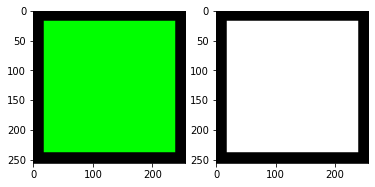

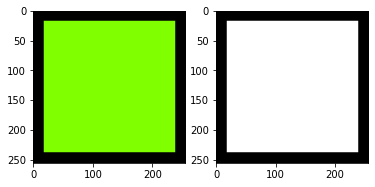

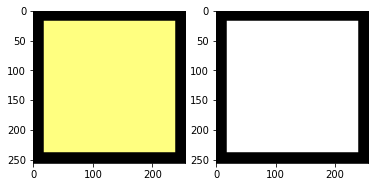

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt

# Create a black image
image = torch.zeros(size=(3, 256, 256), dtype=torch.int)

# Leave the borders and make the rest of the image Green
image[1, 18:256 - 18, 18:256 - 18] = 255

# Create a mask of the same size
mask = torch.zeros(size=(256, 256), dtype=torch.bool)

# Assuming the green region in the original image is the Region of interest, change the mask to white for that area
mask[18:256 - 18, 18:256 - 18] = 1

# Create a view of the mask with the same dimensions as the original image
mask_expanded = mask.expand_as(image)
print(mask_expanded.shape)

mask_np = mask_expanded.numpy().transpose(1, 2, 0) * 255
image_np = image.numpy().transpose(1, 2, 0)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

image[0, mask] += 128
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

image[mask_expanded] += 128
image.clamp_(0, 255)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

In the example above, one can also find a couple of useful tricks:


*   `clamp` method and function is a Pytorch's analogue of NumPy's `clip` function
*   many operations on tensors have in-place form, that does not return modified data, but change values in the tensor. The in-place version of the operation has trailing underscore according to Pytorch's naming convension - in the exmaple above it is `clamp_`
*   tensors have the same indexing as Numpy's arrays - one can use `:` seperated range, negative indexes and so on.


.


---

# Images and their representations

Now, let's discuss images, their representations and how different Python libraries work with them. 

Probably, the most well-known library for image loading and simple processing is [Pillow](https://pillow.readthedocs.io/en/stable/). 

However, many people in deep learning area stick with OpenCV for image loading and processing with some usage of another libraries when it is justified by performance/functionality. This is because OpenCV is in general much faster than the other libraries. Here you can find a couple of benchmarks: 

*   https://www.kaggle.com/zfturbo/benchmark-2019-speed-of-image-reading
*   https://github.com/albumentations-team/albumentations#benchmarking-results

To sum up the benchmarks above, there are two most common image formats, PNG and JPEGs. If your data is in PNG format - use OpenCV to read it. If it is in JPEG - use libturbojpeg. For image processing, use OpenCV if possible. _We will be using PIL a lot along with these._

As you will read the code from others, you may find out that some of them use Pillow/something else to read data. You should know, that color image representations in OpenCV and other libraries are different - OpenCV uses "BGR" channel order, while others use "RGB" one. 

To change "BRG" <-> "RGB" the only thing we need to do it to change channel order.

In [31]:
from google.colab import drive

# this will prompt for authorization
drive.mount('/content/gdrive',force_remount=True)

# dataset file path
filepath = "gdrive/My Drive/colab_folder/datasets/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


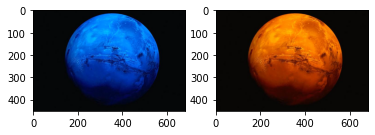

In [32]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2


bgr_image = cv2.imread(filepath+'mars.jpg') 
# remember to add your own image in case you run this block, if you want to use the same image, 
# download it from: https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRCA40ftnscVzfV8ft8e7vIzQXfXeZdtco8nknJrfCUW6INI40U
rgb_image = bgr_image[..., ::-1] # instead of bgr_image[:,:,::-1] can use this 
fig, ax = plt.subplots(1, 2)
ax[0].imshow(bgr_image)
ax[1].imshow(rgb_image)
plt.show()

In [33]:
# Q10
print(bgr_image[:,:,0]) # blue channel (can take sum or mean to compare)

[[5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 ...
 [5 5 5 ... 5 5 5]
 [3 4 4 ... 6 6 6]
 [3 4 4 ... 6 6 6]]


In [34]:
print(bgr_image[:,:,2]) # red channel

[[8 8 8 ... 8 8 8]
 [8 8 8 ... 8 8 8]
 [8 8 8 ... 8 8 8]
 ...
 [8 8 8 ... 8 8 8]
 [6 7 7 ... 9 9 9]
 [6 7 7 ... 9 9 9]]




---

## Question 10:

Looking at the results above it can be said that the pixel values in the blue channels would be very small compared to red channel. True/False? Ans: True


---




# Autograd

Pytorch supports automatic differentiation. The module which implements this is called **AutoGrad**. It calculates the gradients and keeps track in forward and backward passes. For primitive tensors, you need to enable or disable it using the `required_grad` flag. But, for advanced tensors, it is enabled by default

In [35]:
a = torch.rand((3, 5), requires_grad = True)
print(a)
result = a * 5
print(result)

# grad can be implicitly created only for scalar outputs
# so let's calculate the sum here so that the output becomes a scalar and we can apply a backward pass
mean_result = result.sum()
print(mean_result)
# calculate gradient
mean_result.backward()
# print gradient of a
print(a.grad)

tensor([[0.1712, 0.3104, 0.6539, 0.3971, 0.3569],
        [0.9112, 0.4236, 0.9051, 0.8672, 0.8092],
        [0.6672, 0.1917, 0.2772, 0.7451, 0.4237]], requires_grad=True)
tensor([[0.8558, 1.5522, 3.2694, 1.9856, 1.7845],
        [4.5561, 2.1180, 4.5257, 4.3360, 4.0460],
        [3.3362, 0.9586, 1.3859, 3.7255, 2.1183]], grad_fn=<MulBackward0>)
tensor(40.5538, grad_fn=<SumBackward0>)
tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])




---

## Question 11: 

Why the gradient of a is all 5s above? Ans: Because that is what it should be based on how result is defined



---



As we see, Pytorch automagically calculated the gradient value for us. It looks to be the correct value - we multiplied an input by 5, so the gradient of this operation equals to 5.

# Disabling Autograd for tensors

We don't need to compute gradients for all the variables that are involved in the pipeline. The Pytorch API provides 2 ways to disable autograd.

`detach` - returns a copy of the tensor with autograd disabled. This 

1.   copy is built on the same memory as the original tensor, so in-place size / stride / storage changes (such as resize_ / resizeas / set / transpose) modifications are not allowed.
2.   torch.no_grad() - It is a context manager that allows you to guard a series of operations from autograd without creating new tensors.

In [36]:
a = torch.rand((3, 5), requires_grad=True)
detached_a = a.detach()
detached_result = detached_a * 5
result = a * 10
# we cannot do backward pass that is required for autograd using multideminsional output,
# so let's calculate the sum here
mean_result = result.sum()
mean_result.backward()
a.grad

tensor([[10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.]])

In [37]:
a = torch.rand((3, 5), requires_grad=True)
with torch.no_grad():
    detached_result = a * 5
result = a * 10
# we cannot do backward pass that is required for autograd using multideminsional output,
# so let's calculate the sum here
mean_result = result.sum()
mean_result.backward()
a.grad

tensor([[10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.]])

# Custom Network

A fully-connected ReLU network with one hidden layer and no biases, trained to predict y from x by minimizing squared Euclidean distance.

This implementation uses PyTorch tensors to manually compute the forward pass, loss, and backward pass.

A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep learning or computational graphs or gradients, and is just a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that a PyTorch Tensor can run on either CPU or GPU. To run operations on the GPU, just cast the Tensor to a cuda datatype.

In [38]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2*(y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 33619680.0
1 29494276.0
2 27558788.0
3 23967302.0
4 18148866.0
5 11937735.0
6 7128304.5
7 4155969.0
8 2518570.75
9 1646166.125
10 1166139.375
11 882804.25
12 700320.8125
13 572886.375
14 477939.65625
15 403948.8125
16 344318.96875
17 295571.15625
18 255172.203125
19 221423.515625
20 192962.625
21 168747.171875
22 148085.96875
23 130385.34375
24 115164.5546875
25 102002.625
26 90599.1484375
27 80686.1015625
28 72056.328125
29 64497.515625
30 57860.6953125
31 52027.765625
32 46874.69921875
33 42312.98828125
34 38280.484375
35 34693.90625
36 31495.24609375
37 28637.541015625
38 26078.701171875
39 23781.484375
40 21716.908203125
41 19857.69921875
42 18179.7421875
43 16663.015625
44 15290.2861328125
45 14045.353515625
46 12915.8310546875
47 11888.0791015625
48 10952.48828125
49 10099.6064453125
50 9321.3046875
51 8609.990234375
52 7959.1591796875
53 7363.1787109375
54 6817.09716796875
55 6315.73974609375
56 5855.3642578125
57 5432.32958984375
58 5042.65380859375
59 4684.0498046875
60 4353



---
## Question 12

In the code above, why do we have 2 in 2.0*(y_pred - y)? Ans: 
* It does serve the purpose, but we can run the code without it as well, and the model will get trained, though mathematically we would not be accurate in calling it proper gradient. (without "2" convergence is slower, loss is still higher)

* We are calculating the gradient of y which is derivate of (y_pred - y)^2. When we perform derivative of a squared entity, "2" comes as a multiplier.

## Question 13
In the code above, what does `grad_h[h < 0] = 0` signify? Ans: This operation refers to the derivative of ReLU function

## Question 14
In the code above, how many "epochs" have we trained the model for? Ans: 500

## Question 15
In the code above, if we take the trained model, and run it on fresh  inputs, the trained model will be able to predict fresh output with high accuracy. Ans: False 

## Question 16
In the code above, if we dont use clone in `grad_h = grad_h_relu.clone()` the model will still train without any issues. Ans: True 

## Quiz:
1. (Mostly) whenever we see kernel visualizations online (or some other reference) we are actually seeing:
 
 What kernels extract.

2. What all do we need to consider when we decide the number of kernels in our 11x11 receptive field layer?
 
 * Expressiveness required.
 * Inter and intra class variations.
 * Hardware capacity.

3. Select the ones which are true
   
  *  We use strides sometimes on resource constraint hardware.
  * We tend not to use strides as they do not read spatial data evenly, causing checkboard issue.
  * When using strides, the channels created after convolutions are blurry (not consistent).

4. What are the benefits of 1x1 Convolution?
 
 * Lesser computation requirement for reducing the number of channels.
 * Use of existing channels to create complex channels (instead of re-convolution).
 * Less number of parameters.
 * Reduces the burden of channel selection on 3x3. 

5. Why do we not use 1x1 to increase the number of channels? 
 
  That's not true. We can use 1x1 to increase the number of channels, just that we need to have a purpose.

6. Why do we need an activation function?

 * To  provide decision making power to the neurons/DNN.
 * To provide non-linearity.

7. Why do we need non-linearity in our neural networks?
 
 * Not everything can be expressed using linear functions.
 * Non-linearity allows DNN to act like a Universal Approximation Function.

8. Why sigmoid activation functions are not used? 
 
 * They cause vanishing gradient issue.

9. Select which activation function you'll use in CNN.
 
 ReLU

10. You'll try and never use Fully Connected Layers?
 
 Yes.

11. Why do we generally not prefer to add stride of more than 1?
 
 It causes checkerboard issue, as we are not reading all pixels equal number of time (ignoring the corner pixels)

12. What all features does ReLU provide us?
 
 * Easy way to communicate with BackProp to use negative values if that information needs to be filtered out.
 * Easy way to communicate with BackProp to use positive values if some information needs to be not filtered out.
 * Very low computation requirements.

13. ReLU is defined as:

 0 when x is less than or equal to zero

 x when x is more than zero

 Any activation function must be differentiable if we were to use it in our DNNs (else backprop would not work). Knowing that we indeed use ReLU, what do you think is the derivative of ReLU?
  
  0 when x is less than or equal to zero, 1 when x is positive.

14. We know that when we use a kernel of size 3x3 and a stride of 1, the receptive field increases by 2. 

 If we use MaxPooling with kernel size 3x3 and with a stride of 1, will the receptive field increase by 2? 

 True.




 


### That's all Folks!